In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Start date: 2016-08-23 - End date: 2017-08-23


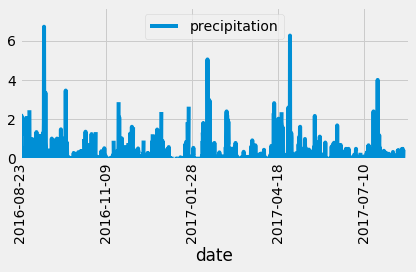

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
rain = [Measurement.date, Measurement.prcp]

# Calculate the date 1 year ago from the last data point in the database
lastday = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1)
endday = dt.datetime.strptime(lastday[0][0], '%Y-%m-%d').date()
startday = endday - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(*rain).filter(Measurement.station == Station.station).\
            filter(Measurement.date >= startday).\
            filter(Measurement.date <= endday).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'],inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.ylim(0,max(df['precipitation'])+1)
plt.xlim(0,len(df)+30)
plt.tight_layout()
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
